In [1]:
import numpy as np
import pandas as pd 
import time 
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import MinMaxScaler

 Bylo potřeba stáhnout česká trénovací data

In [2]:
import simplemma
from PIL import Image
# import pytesseract as pt
import pytesseract
import os

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

# path for the folder for getting the raw images
# path ="C:/Users/Honza/Desktop/Diplomka/GitHubShare/DMInCybersecurity/Dataset/PhishImages"
phishPath = "C:/Users/honza/OneDrive/Plocha/Diplomka/GitHubShare/DMInCybersecurity/Dataset/PhishImages"
phishText = list()
for imageName in os.listdir(phishPath):
    inputPath = os.path.join(phishPath, imageName)
    img = Image.open(inputPath)
    # applying ocr using pytesseract for python
    text = pytesseract.image_to_string(img, lang ="ces")
            # Strip pro odstranění nových řádků

    text = text.replace("\n", " ").replace("\r", " ").replace(".","").replace(",","").split()

    phishText.append(text)
    
validPath = "C:/Users/honza/OneDrive/Plocha/Diplomka/GitHubShare/DMInCybersecurity/Dataset/ValidImages"
validText = list()
for imageName in os.listdir(validPath):
    inputPath = os.path.join(validPath, imageName)
    img = Image.open(inputPath)
    # applying ocr using pytesseract for python
    text = pytesseract.image_to_string(img, lang ="ces")
            # Strip pro odstranění nových řádků

    text = text.replace("\n", " ").replace("\r", " ").replace(".","").replace(",","").split()

    validText.append(text)



In [3]:
print(validText)

[['Dobrý', 'den', 'pořádek', 'dělá', 'přátele', 'proto', 'Vám', 'v', 'příloze', 'zasíláme', 'výpis', 'z', 'úč', 'Běžný', 'účet', '1', 'za', 'období', '01072022', '-', '31072022', 'Pro', 'větší', 'bezpečnost', 'jsme', 'výpis', 'ochránili', 'heslem', 'Tímto', 'heslem', 'je', 'devítimístné', 'telefonní', 'číslo', 'majitele', 'účtu', 'které', 'platilo', 'v', 'okamžiku', 'vytvoření', 'výpisu', 'Zasílání', 'výpisů', 'si', 'můžete', 'jednoduše', 'upravit', 'v', 'internetovém', 'bankovnictví', 'přes', 'Účty', 'a', 'karty', '/', 'Možnosti', '/', 'Nastavení', 'posílání', 'výpi', 'sti', 'Poradna', 'Najdete', 'ji', 'na', 'htips:/wwwairbankcz/poradna/', 'Rádi', 'Vás', 'také', 'uvidíme', 'na', 'kterékoliv', 'z', 'našich', 'poboček', 'Pokud', 'Vás', 'zajímá', 'cokoliv', 'k', 'našim', 'službám', 'zeptejte', 'se', 'na:', 'sistentky', 'Anety', 'nebo', 'se', 'zkuste', 'podívat', 'na', 'naše', 'webové', 'stránky', 'do', 'Přejeme', 'Vám', 'pěkný', 'den', 'Vaše', 'Air', 'Bank', 'Air', 'Bank', 'as', '/', 'Ev

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

newlistphish = []
newlistvalid = []

for i in phishText:
    newlistphish.append(' '.join(i))

for i in validText:
    newlistvalid.append(' '.join(i))

dfphish = pd.DataFrame(data=newlistphish,columns = ["message"])
dfphish['Label'] = 1
dfvalid = pd.DataFrame(data=newlistvalid,columns = ["message"])
dfvalid['Label'] = 0

dfmerged = [dfphish, dfvalid]

df = pd.concat(dfmerged, ignore_index=True)
df['num_char'] = df['message'].apply(len)
df["num_wd"] = df.apply(lambda row: nltk.word_tokenize(row["message"], language='czech'), axis=1).apply(len)
df["num_sn"] = df.apply(lambda row: nltk.sent_tokenize(row["message"], language='czech'), axis=1).apply(len)

print(display(df))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\honza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,message,Label,num_char,num_wd,num_sn
0,Nastavení bezpečnostních otázek jako ověřovací...,1,642,90,2
1,Aktualizace účtu - AirBank Vážený zákazníku Ch...,1,599,88,1
2,szníku Vážený Z důvodu nedávno uskutečněné bez...,1,429,57,1
3,Dobrý den Obdrželi jste novou zprávu ve airban...,1,175,27,1
4,[Zkontrolujte svůj účet Chcete-li chránit svůj...,1,258,42,1
...,...,...,...,...,...
222,Vážený kiiente jsem skutečně hrdý na to že jse...,0,1944,313,1
223,Vážený kiente dovolujeme si Vám připomenout že...,0,607,98,1
224,Vážený kliente dovolujeme si Vás informovat že...,0,935,156,1
225,Milý kliente Vánoce máme spojené s představou ...,0,746,124,1


None


In [5]:
import re
import sys

def cz_stem(word, aggressive=False):
    if not re.match("^\\w+$", word):
        return word
    if not word.islower() and not word.istitle() and not word.isupper():
        print("warning: skipping word with mixed case: {}".format(word),
              file=sys.stderr)
        return word
    s = word.lower() # all our pattern matching is done in lowercase
    s = _remove_case(s)
    s = _remove_possessives(s)
    if aggressive:
        s = _remove_comparative(s)
        s = _remove_diminutive(s)
        s = _remove_augmentative(s)
        s = _remove_derivational(s)
    if word.isupper():
        return s.upper()
    if word.istitle():
        return s.title()
    return s

def _remove_case(word):
    if len(word) > 7 and word.endswith("atech"):
        return word[:-5]
    if len(word) > 6:
        if word.endswith("ětem"):
            return _palatalise(word[:-3])
        if word.endswith("atům"):
            return word[:-4]
    if len(word) > 5:
        if word[-3:] in {"ech", "ich", "ích", "ého", "ěmi", "emi", "ému",
                         "ete", "eti", "iho", "ího", "ími", "imu"}:
            return _palatalise(word[:-2])
        if word[-3:] in {"ách", "ata", "aty", "ých", "ama", "ami",
                         "ové", "ovi", "ými"}:
            return word[:-3]
    if len(word) > 4:
        if word.endswith("em"):
            return _palatalise(word[:-1])
        if word[-2:] in {"es", "ém", "ím"}:
            return _palatalise(word[:-2])
        if word[-2:] in {"ům", "at", "ám", "os", "us", "ým", "mi", "ou"}:
            return word[:-2]
    if len(word) > 3:
        if word[-1] in "eiíě":
            return _palatalise(word)
        if word[-1] in "uyůaoáéý":
            return word[:-1]
    return word

def _remove_possessives(word):
    if len(word) > 5:
        if word[-2:] in {"ov", "ův"}:
            return word[:-2]
        if word.endswith("in"):
            return _palatalise(word[:-1])
    return word

def _remove_comparative(word):
    if len(word) > 5:
        if word[-3:] in {"ejš", "ějš"}:
            return _palatalise(word[:-2])
    return word

def _remove_diminutive(word):
    if len(word) > 7 and word.endswith("oušek"):
        return word[:-5]
    if len(word) > 6:
        if word[-4:] in {"eček", "éček", "iček", "íček", "enek", "ének",
                         "inek", "ínek"}:
            return _palatalise(word[:-3])
        if word[-4:] in {"áček", "aček", "oček", "uček", "anek", "onek",
                         "unek", "ánek"}:
            return _palatalise(word[:-4])
    if len(word) > 5:
        if word[-3:] in {"ečk", "éčk", "ičk", "íčk", "enk", "énk",
                         "ink", "ínk"}:
            return _palatalise(word[:-3])
        if word[-3:] in {"áčk", "ačk", "očk", "učk", "ank", "onk",
                         "unk", "átk", "ánk", "ušk"}:
            return word[:-3]
    if len(word) > 4:
        if word[-2:] in {"ek", "ék", "ík", "ik"}:
            return _palatalise(word[:-1])
        if word[-2:] in {"ák", "ak", "ok", "uk"}:
            return word[:-1]
    if len(word) > 3 and word[-1] == "k":
        return word[:-1]
    return word

def _remove_augmentative(word):
    if len(word) > 6 and word.endswith("ajzn"):
        return word[:-4]
    if len(word) > 5 and word[-3:] in {"izn", "isk"}:
        return _palatalise(word[:-2])
    if len(word) > 4 and word.endswith("ák"):
        return word[:-2]
    return word

def _remove_derivational(word):
    if len(word) > 8 and word.endswith("obinec"):
        return word[:-6]
    if len(word) > 7:
        if word.endswith("ionář"):
            return _palatalise(word[:-4])
        if word[-5:] in {"ovisk", "ovstv", "ovišt", "ovník"}:
            return word[:-5]
    if len(word) > 6:
        if word[-4:] in {"ásek", "loun", "nost", "teln", "ovec", "ovík",
                         "ovtv", "ovin", "štin"}:
            return word[:-4]
        if word[-4:] in {"enic", "inec", "itel"}:
            return _palatalise(word[:-3])
    if len(word) > 5:
        if word.endswith("árn"):
            return word[:-3]
        if word[-3:] in {"ěnk", "ián", "ist", "isk", "išt", "itb", "írn"}:
            return _palatalise(word[:-2])
        if word[-3:] in {"och", "ost", "ovn", "oun", "out", "ouš",
                         "ušk", "kyn", "čan", "kář", "néř", "ník",
                         "ctv", "stv"}:
            return word[:-3]
    if len(word) > 4:
        if word[-2:] in {"áč", "ač", "án", "an", "ář", "as"}:
            return word[:-2]
        if word[-2:] in {"ec", "en", "ěn", "éř", "íř", "ic", "in", "ín",
                         "it", "iv"}:
            return _palatalise(word[:-1])
        if word[-2:] in {"ob", "ot", "ov", "oň", "ul", "yn", "čk", "čn",
                         "dl", "nk", "tv", "tk", "vk"}:
            return word[:-2]
    if len(word) > 3 and word[-1] in "cčklnt":
        return word[:-1]
    return word

def _palatalise(word):
    if word[-2:] in {"ci", "ce", "či", "če"}:
        return word[:-2] + "k"

    if word[-2:] in {"zi", "ze", "ži", "že"}:
        return word[:-2] + "h"

    if word[-3:] in {"čtě", "čti", "čtí"}:
        return word[:-3] + "ck"

    if word[-3:] in {"ště", "šti", "ští"}:
        return word[:-3] + "sk"
    return word[:-1]

if __name__ == '__main__':
    if len(sys.argv) != 2 or sys.argv[1] not in ("light", "aggressive"):
        sys.exit("usage: {} light|aggressive".format(sys.argv[0]))
    aggressive = sys.argv[1] == "aggressive"
    for line in sys.stdin:
        print(*[cz_stem(word, aggressive=aggressive)
                for word in line.split()])

SystemExit: usage: C:\Users\honza\anaconda3\lib\site-packages\ipykernel_launcher.py light|aggressive

C:\Users\honza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


     num_char  num_wd  num_sn  Label
0         642      90       2      1
1         599      88       1      1
2         429      57       1      1
3         175      27       1      1
4         258      42       1      1
..        ...     ...     ...    ...
222      1944     313       1      0
223       607      98       1      0
224       935     156       1      0
225       746     124       1      0
226       556      90       1      0

[227 rows x 4 columns]


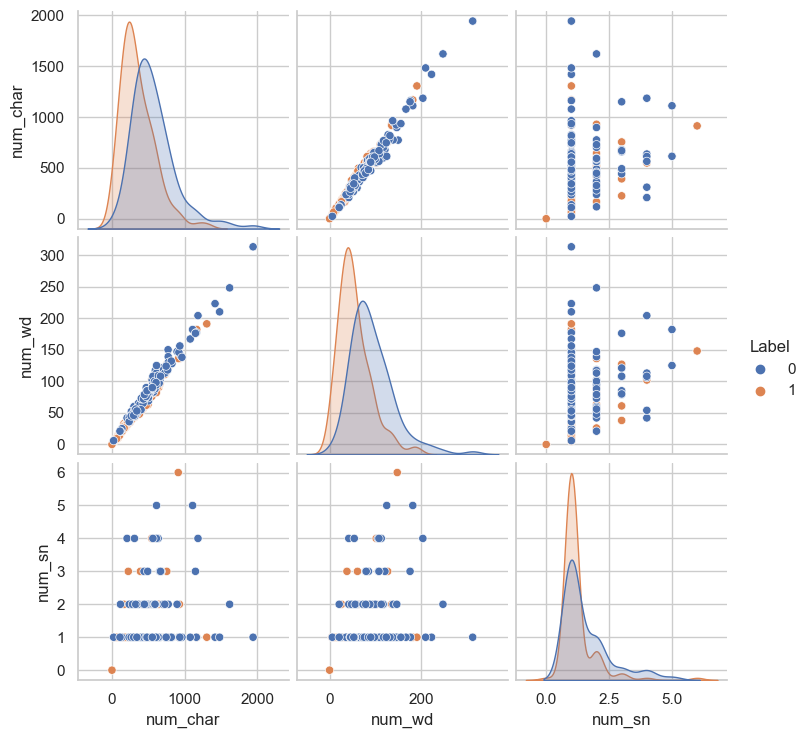

In [41]:
import seaborn
dfsubset = df[["num_char", "num_wd", "num_sn", "Label"]]

print(dfsubset)

seaborn.pairplot(dfsubset,hue='Label')
plt.show()


In [6]:
print(cz_stem("vážený", aggressive=True))

váh


In [7]:
stopwords = []

for i in open("C:/Users/honza/OneDrive/Plocha/Diplomka/GitHubShare/DMInCybersecurity/Prakticka/stopwords.txt", "r", encoding="utf-8"):
    stopwords.append(i.strip())
print(len(stopwords))
print(stopwords)

423
['a', 'aby', 'ahoj', 'aj', 'ale', 'anebo', 'ani', 'aniž', 'ano', 'asi', 'aspoň', 'atd', 'atp', 'az', 'ačkoli', 'až', 'bez', 'beze', 'blízko', 'bohužel', 'brzo', 'bude', 'budem', 'budeme', 'budes', 'budete', 'budeš', 'budou', 'budu', 'by', 'byl', 'byla', 'byli', 'bylo', 'byly', 'bys', 'byt', 'být', 'během', 'chce', 'chceme', 'chcete', 'chceš', 'chci', 'chtít', 'chtějí', "chut'", 'chuti', 'ci', 'clanek', 'clanku', 'clanky', 'co', 'coz', 'což', 'cz', 'daleko', 'dalsi', 'další', 'den', 'deset', 'design', 'devatenáct', 'devět', 'dnes', 'do', 'dobrý', 'docela', 'dva', 'dvacet', 'dvanáct', 'dvě', 'dál', 'dále', 'děkovat', 'děkujeme', 'děkuji', 'email', 'ho', 'hodně', 'i', 'jak', 'jakmile', 'jako', 'jakož', 'jde', 'je', 'jeden', 'jedenáct', 'jedna', 'jedno', 'jednou', 'jedou', 'jeho', 'jehož', 'jej', 'jeji', 'jejich', 'její', 'jelikož', 'jemu', 'jen', 'jenom', 'jenž', 'jeste', 'jestli', 'jestliže', 'ještě', 'jež', 'ji', 'jich', 'jimi', 'jinak', 'jine', 'jiné', 'jiz', 'již', 'jsem', 'jses',

In [8]:
phishTransformated = []
validTransformated = []
    
for i in phishText:
    inner_list = []
    for x in i:
        if x not in stopwords and len(x) > 1 and not any(c.isdigit() for c in x):
            inner_list.append(cz_stem(simplemma.lemmatize(x, lang='cs').lower(), aggressive=True))
    # phish label
    # inner_list.append(1)        
    phishTransformated.append(inner_list)
    
for i in validText:
    inner_list = []
    for x in i:
        if x not in stopwords and len(x) > 1 and not any(c.isdigit() for c in x):
            inner_list.append(cz_stem(simplemma.lemmatize(x, lang='cs').lower(), aggressive=True))
    # valid label
    # inner_list.append(0) 
    validTransformated.append(inner_list)
        
print(phishTransformated)
print(validTransformated)

# print(stopwords)

[['nastav', 'bezpečnost', 'otáz', 'ověřova', 'metod', 'dokonav', 'správ', 'tvůj', 'organiza', 'akt', 'bezpečnost', 'otáz', 'metod', 'ověř', 'úče', 'obnov', 'hes', 'metod', 'bezpečnost', 'informa', 'použív', 'dvoufaktor', 'ověř', 'zabezpek', 'resetov', 'hes', 'ne', 'všech', 'metod', 'lze', 'použív', 'oba', 'případ', 'závisl', 'nastav', 'tvůj', 'organiza', 'mok', 'jed', 'metod', 'bezpečnost', 'informa', 'vol', 'zodpovědě', 'něko', 'bezpečnost', 'otáz', 'správ', 'nastav', 'poče', 'bezpečnost', 'otáz', 'muse', 'vol', 'zodpovědě', 'nastav', 'bezpečnost', 'ky', 'plat', 'odkaz', 'vyprše', 'hod', 'obdrh', 'e-mailu'], ['aktualiza', 'úče', 'airb', 'váh', 'zákaz', 'chtí', 'být', 'ty', 'zdůrazn', 'přístup', 'tvůj', 'interne', 'bankovni', 'brz', 'vyprše', 'aba', 'mož', 'nadá', 'využí', 'on-line', 'bankovni', 'žád', 'ty', 'potvrh', 'údaj', 'pomo', 'odkaz', 'níh', 'pro', 'aktualiza', 'svůj', 'on-line', 'bank', 'úče', 'klikně', 'bank', 'úče', 'automat', 'obnov', 'pot', 'ty', 'kontak', 'naš', 'zaměstna

In [9]:
print(len(phishTransformated[0]))

64


In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

newlistphish = []
newlistvalid = []

for i in phishTransformated:
    newlistphish.append(' '.join(i))

for i in validTransformated:
    newlistvalid.append(' '.join(i))
    
list3 = newlistphish + newlistvalid

print(list3)

import joblib
joblib.dump(list3,'train2stem')

['nastav bezpečnost otáz ověřova metod dokonav správ tvůj organiza akt bezpečnost otáz metod ověř úče obnov hes metod bezpečnost informa použív dvoufaktor ověř zabezpek resetov hes ne všech metod lze použív oba případ závisl nastav tvůj organiza mok jed metod bezpečnost informa vol zodpovědě něko bezpečnost otáz správ nastav poče bezpečnost otáz muse vol zodpovědě nastav bezpečnost ky plat odkaz vyprše hod obdrh e-mailu', 'aktualiza úče airb váh zákaz chtí být ty zdůrazn přístup tvůj interne bankovni brz vyprše aba mož nadá využí on-line bankovni žád ty potvrh údaj pomo odkaz níh pro aktualiza svůj on-line bank úče klikně bank úče automat obnov pot ty kontak naš zaměstnan běh aktualiza dos sms zpráv informa vach čísn změn ignor zpráv hod aktualiza všech pořád pozdrav klár pačes agen zákazn servis', 'szn váh důvod nedáv uskutečn bezpečnost kontro oblas interne bankovni airb ty žád potvrh údaj klients úče pro zach tvůj bezpeč pokr kliknut níh uved aktualizov odkaz pros postupuj uved pok 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\honza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['train2stem']

In [11]:
print(phishTransformated[0])

['nastav', 'bezpečnost', 'otáz', 'ověřova', 'metod', 'dokonav', 'správ', 'tvůj', 'organiza', 'akt', 'bezpečnost', 'otáz', 'metod', 'ověř', 'úče', 'obnov', 'hes', 'metod', 'bezpečnost', 'informa', 'použív', 'dvoufaktor', 'ověř', 'zabezpek', 'resetov', 'hes', 'ne', 'všech', 'metod', 'lze', 'použív', 'oba', 'případ', 'závisl', 'nastav', 'tvůj', 'organiza', 'mok', 'jed', 'metod', 'bezpečnost', 'informa', 'vol', 'zodpovědě', 'něko', 'bezpečnost', 'otáz', 'správ', 'nastav', 'poče', 'bezpečnost', 'otáz', 'muse', 'vol', 'zodpovědě', 'nastav', 'bezpečnost', 'ky', 'plat', 'odkaz', 'vyprše', 'hod', 'obdrh', 'e-mailu']


In [12]:
df1 = pd.DataFrame(phishTransformated)
df2 = pd.DataFrame(validTransformated)
 

In [13]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,nastav,bezpečnost,otáz,ověřova,metod,dokonav,správ,tvůj,organiza,akt,bezpečnost,otáz,metod,ověř,úče,obnov,hes,metod,bezpečnost,informa,použív,dvoufaktor,ověř,zabezpek,resetov,hes,ne,všech,metod,lze,použív,oba,případ,závisl,nastav,tvůj,organiza,mok,jed,metod,bezpečnost,informa,vol,zodpovědě,něko,bezpečnost,otáz,správ,nastav,poče,bezpečnost,otáz,muse,vol,zodpovědě,nastav,bezpečnost,ky,plat,odkaz,vyprše,hod,obdrh,e-mailu,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,aktualiza,úče,airb,váh,zákaz,chtí,být,ty,zdůrazn,přístup,tvůj,interne,bankovni,brz,vyprše,aba,mož,nadá,využí,on-line,bankovni,žád,ty,potvrh,údaj,pomo,odkaz,níh,pro,aktualiza,svůj,on-line,bank,úče,klikně,bank,úče,automat,obnov,pot,ty,kontak,naš,zaměstnan,běh,aktualiza,dos,sms,zpráv,informa,vach,čísn,změn,ignor,zpráv,hod,aktualiza,všech,pořád,pozdrav,klár,pačes,agen,zákazn,servis,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,szn,váh,důvod,nedáv,uskutečn,bezpečnost,kontro,oblas,interne,bankovni,airb,ty,žád,potvrh,údaj,klients,úče,pro,zach,tvůj,bezpeč,pokr,kliknut,níh,uved,aktualizov,odkaz,pros,postupuj,uved,pok,můj,specializov,tým,zákaz,ty,kontak,následují,hod,klikně,níh,pozdrav,tým,airb,interne,banking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,dokonav,obdrže,nov,zpráv,airb,prostor,připoj,tvůj,zákazn,ploch,airb,kliknut,příchod,airb,služb,správ,úče,tým,ban,onl,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,[zkontrolujte,úče,chcete-li,uchrán,úče,muse,údaj,potvrd,důvod,poznám,přihlás,jind,pokus,podvés,úče,chcete-li,úče,udrže,muse,údaj,potvrd,pok,níh,uvede,odkaz,klikně,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [135]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,dokonav,pořád,děl,přátel,ty,příloh,zasílám,výpis,úča,běž,úče,obd,01072022,31072022,pro,vel,bezpeč,výpis,ochrán,hes,ten,hes,devítimíst,telefon,čísn,maj,úče,plat,okamh,vytvoř,výpis,zasíl,výpis,mok,jednoduš,uprav,interne,bankovni,úče,kar,mož,nastav,posí,výp,sti,porad,nají,htips:/wwwairbankcz/poradna/,rád,ty,uvidě,kterýkol,můj,pob,pokud,ty,zajím,cokol,můj,služb,zep,na:,sisten,ane,zkus,dív,web,str,přejem,ty,pěk,vach,air,ban,air,ban,as,evrops,2690/17,160,00,prah,/ič,29045371,společ,zaps,rejstř,soud,prah,spis,zna,16013,156/20/01,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,dokonav,"""xiaomi",red,"9t""",nov,propoj,aplika,mož,platb,mok,at,mobil,aplika,pojm,vach,přá,změn,způs,potvrzov,platb,dalš,akk,interne,bankovni,nov,po:,bezpečnost,důvod,potvrd,něko,hod,jest,způs,potvrzov,neměni,zavo,547,134,134,přejem,ty,pěk,vach,air,ban,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,nov,ty,sazb,roč,úrok,vach,úspor,výš,500,000,kč,dokonav,stá,hled,způs,ty,mok,udě,rad,15,červen,2022,měn,koru,spoři,úče,bonus,úrok,zůsta,250,koru,500,koru,ten,pásm,začí,úrok,sazb,roč,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,dokonav,mobi,aplika,já,air,tvůj,zaříh,honor,10,práv,odpoj,tvůj,úče,pomo,já,aiř,zaříh,ban,jít,snad,pořád,tvůj,přá,pokud,ty,zajím,cokol,můj,služb,podivej,web,str,https://www,airbankcz/co-vas-nejvic-zajima/,zastav,pob,rád,ty,uvidě,přejem,ty,pěk,vach,air,ban,None,N

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

dfmerged = [df1, df2]

df = pd.concat(dfmerged, ignore_index=True)

display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,nastav,bezpečnost,otáz,ověřova,metod,dokonav,správ,tvůj,organiza,akt,bezpečnost,otáz,metod,ověř,úče,obnov,hes,metod,bezpečnost,informa,použív,dvoufaktor,ověř,zabezpek,resetov,hes,ne,všech,metod,lze,použív,oba,případ,závisl,nastav,tvůj,organiza,mok,jed,metod,bezpečnost,informa,vol,zodpovědě,něko,bezpečnost,otáz,správ,nastav,poče,bezpečnost,otáz,muse,vol,zodpovědě,nastav,bezpečnost,0!,ky,plat,odkaz,vyprše,48,hod,obdrh,e-mailu,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aktualiza,úče,airb,váh,zákaz,chtí,být,ty,zdůrazn,přístup,tvůj,interne,bankovni,brz,vyprše,aba,mož,nadá,využí,on-line,bankovni,žád,ty,potvrh,údaj,pomo,odkaz,níh,pro,aktualiza,svůj,on-line,bank,úče,klikně,bank,úče,automat,obnov,pot,ty,kontak,naš,zaměstnan,běh,aktualiza,dos,sms,zpráv,informa,vach,čísn,změn,ignor,zpráv,24,hod,aktualiza,všech,pořád,pozdrav,klár,pačes,agen,zákazn,servis,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,szn,váh,důvod,nedáv,uskutečn,bezpečnost,kontro,oblas,interne,bankovni,airb,ty,žád,potvrh,údaj,klients,úče,pro,zach,tvůj,bezpeč,pokr,kliknut,níh,uved,aktualizov,odkaz,pros,postupuj,uved,pok,můj,specializov,tým,zákaz,ty,kontak,následují,24-48,hod,klikně,níh,pozdrav,tým,airb,interne,banking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dokonav,obdrže,nov,zpráv,airb,prostor,připoj,tvůj,zákazn,ploch,airb,kliknut,příchod,airb,služb,správ,úče,tým,ban,onl,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [14]:
vect = CountVectorizer()

In [15]:
coun_vect = CountVectorizer(lowercase=False)

count_matrixphish = coun_vect.fit_transform(newlistphish)
count_arrayphish = count_matrixphish.toarray()
dfphish = pd.DataFrame(data=count_arrayphish,columns = coun_vect.get_feature_names())
dfphish['Label'] = 1
print(dfphish)

count_matrixvalid = coun_vect.fit_transform(newlistvalid)
count_arrayvalid = count_matrixvalid.toarray()
dfvalid = pd.DataFrame(data=count_arrayvalid,columns = coun_vect.get_feature_names())
dfvalid['Label'] = 0
    
print(dfvalid)





C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     ab  aba  aby  account  aco  ad  adam  address  adiseetmfcrcz  adob  adre  \
0     0    0    0        0    0   0     0        0              0     0     0   
1     0    1    0        0    0   0     0        0              0     0     0   
2     0    0    0        0    0   0     0        0              0     0     0   
3     0    0    0        0    0   0     0        0              0     0     0   
4     0    0    0        0    0   0     0        0              0     0     0   
..   ..  ...  ...      ...  ...  ..   ...      ...            ...   ...   ...   
108   0    0    1        1    0   0     0        0              0     0     0   
109   0    0    0        0    0   0     0        0              0     0     0   
110   0    0    0        0    0   0     0        0              0     0     0   
111   0    0    0        0    0   0     0        0              0     0     0   
112   0    0    0        0    0   0     0        0              0     0     0   

     adres  adresa  adresar

In [16]:
dfmerged = [dfvalid, dfphish]

df = pd.concat(dfmerged, ignore_index=True)
df = df.fillna(0)

display(df)

aba  absolven  aby  accoun  administrativ  adres  adresa  adrese  \
0      0       0.0    0     0.0            0.0      0       0     0.0   
1      0       0.0    0     0.0            0.0      0       0     0.0   
2      0       0.0    0     0.0            0.0      0       0     0.0   
3      0       0.0    0     0.0            0.0      0       0     0.0   
4      0       0.0    0     0.0            0.0      0       0     0.0   
..   ...       ...  ...     ...            ...    ...     ...     ...   
222    0       0.0    1     0.0            0.0      0       0     0.0   
223    0       0.0    0     0.0            0.0      0       0     0.0   
224    0       0.0    0     0.0            0.0      0       0     0.0   
225    0       0.0    0     0.0            0.0      0       0     0.0   
226    0       0.0    0     0.0            0.0      0       0     0.0   

     advisors  afilaci  agentur  air  airbankcz  aiř  ajej  akk  akt  aktiv  \
0         0.0      0.0        0  2.0        0.0  0.0   0.0    0    0      0   
1         0.0      0.0        0  1.0        0.0  0.0   0.0    1    0      0   
2         0.0      0.0        0  0.0        0.0  0.0   0.0    0    0      0   
3         0.0      0.0        0  2.0        1.0  1.0   0.0    0    0      0   
4         0.0      0.0        0  2.0        0.0  0.0   0.0    0    0      0   
..        ...      ...      ...  ...        ...  ...   ...  ...  ...    ...   
222       0.0      0.0        0  0.0        0.0  0.0   0.0    1    0      0   
223       0.0      0.0        0  0.0        0.0  0.0   0.0    0    0      0   
224       0.0      0.0        0  0.0        0.0  0.0   0.0    0    0      0   
225       0.0      0.0        0  0.0        0.0  0.0   0.0    0    0      0   
226       0.0      0.0        0  0.0        0.0  0.0   0.0    0    0      0   

     aktiva  aktivum  aktualiz  aktualiza  aktualizov  aktuál  aktv   al  \
0       0.0      0.0         0          0           0       0   0.0  0.0   
1       0.0      0.0         0          0           0       0   0.0  0.0   
2       0.0      0.0         0          0           0       0   0.0  0.0   
3       0.0      0.0         0          0           0       0   0.0  0.0   
4       0.0      0.0         0          0           0       0   0.0  0.0   
..      ...      ...       ...        ...         ...     ...   ...  ...   
222     0.0      0.0         0          0           0       0   0.0  0.0   
223     0.0      0.0         0          0           0       0   0.0  0.0   
224     0.0      0.0         0          0           0       0   0.0  0.0   
225     0.0      0.0         0          0           0       0   0.0  0.0   
226     0.0      0.0         0          0           0       0   0.0  0.0   

     alber  alesp  aleš  alianz  aliexpress  allianz  allianzcz  alzabox  \
0      0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
1      0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
2      0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
3      0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
4      0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
..     ...    ...   ...     ...         ...      ...        ...      ...   
222    0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
223    0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
224    0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
225    0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   
226    0.0    0.0   0.0     0.0         0.0      0.0        0.0      0.0   

     alšér  amer  anas  and  andre  ane  ano  anonym  api  aplika  app  \
0      0.0   0.0   0.0  0.0    0.0  1.0    0       0  0.0       0    0   
1      0.0   0.0   0.0  0.0    0.0  0.0    0       0  0.0       2    0   
2      0.0   0.0   0.0  0.0    0.0  0.0    0       0  0.0       0    0   
3      0.0   0.0   0.0  0.0    0.0  0.0    0       0  0.0

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #pro počítání přesnosti


In [18]:
X = df.drop(["Label"], axis=1)

y = df["Label"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(158, 2807) (69, 2807) (158,) (69,)


In [37]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [38]:
predictions = clf.predict(X_test)



In [39]:


from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))



Accuracy of model is 89.85507246376811%


In [44]:
from sklearn.naive_bayes import MultinomialNB

c_space = np.logspace(-5, 8, 15)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy of model is {}%".format(accuracy_score(y_test,y_pred) * 100))

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

import joblib
joblib.dump(classifier,'Multinominal.pkl')

Accuracy of model is 94.20289855072464%


['Multinominal.pkl']

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


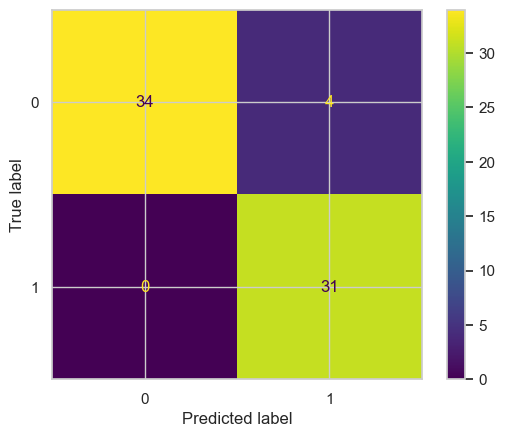

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.9393939393939393
0.9420289855072463
0.8857142857142857
1.0


In [26]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)

param_grid = {'penalty': ['l1', 'l2']}

classifier = MultinomialNB()
classifier_cv = GridSearchCV(classifier, param_grid, cv=10)

classifier_cv.fit(X_train, y_train)

y_pred = classifier_cv.predict(X_test)

print("Accuracy of model is {}%".format(accuracy_score(y_test,y_pred) * 100))

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

import joblib
joblib.dump(classifier,'Multinominal.pkl')

ValueError: Invalid parameter penalty for estimator MultinomialNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [24]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Create a GridSearchCV object to tune the hyperparameters
classifier_cv = GridSearchCV(classifier, param_grid, cv=10)

# Fit the classifier to the training data
classifier_cv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_cv.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of model is {:.2f}%".format(accuracy * 100))

NameError: name 'GridSearchCV' is not defined

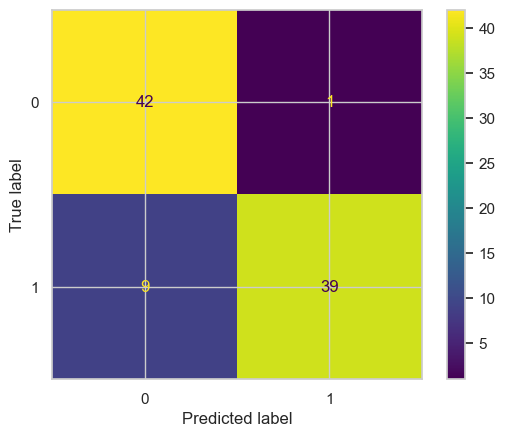

In [143]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_cv, X_test, y_test)

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


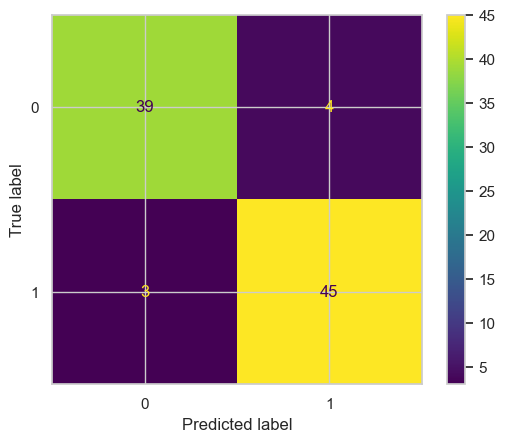

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


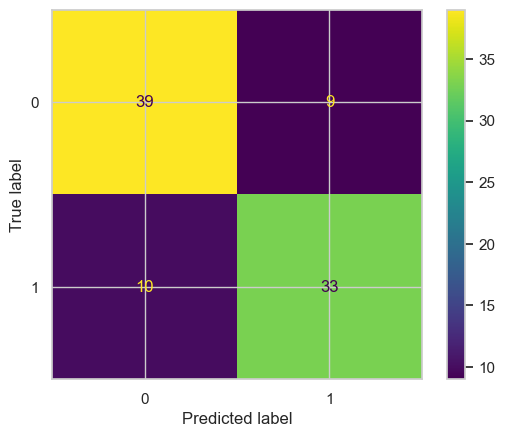

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [41]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(solver='liblinear')
c_space = np.logspace(-5, 8, 15)
param_grid = {'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

logreg_cv.fit(X_train, y_train)

import joblib
joblib.dump(logreg_cv,'logregstem.pkl')


['logregstem.pkl']

In [42]:
predictionslog = logreg_cv.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictionslog) * 100))


Accuracy of model is 92.7536231884058%


In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

logreg_cv.best_score_

0.9346153846153846

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_cv, X_train, y_train, cv=10)
scores

array([0.85714286, 1.        , 0.85714286, 0.85714286, 1.        ,
       0.92857143, 0.84615385, 1.        , 1.        , 1.        ])

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_cv, X_test, y_test, cv=10)
scores

array([0.8       , 0.77777778, 0.88888889, 0.88888889, 1.        ,
       1.        , 0.88888889, 1.        , 0.77777778, 0.88888889])

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


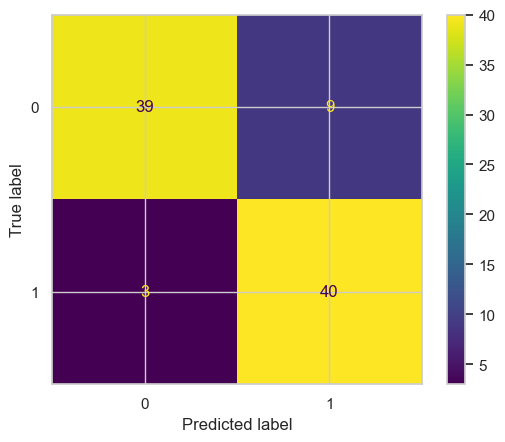

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_cv, X_test, y_test)

In [59]:
import pickle 
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

log_model = LogisticRegression(C=1)
log_model.fit(X_scaled, y)

pickle.dump(modeldc, open("ml_modeltext.sav", "wb"))
pickle.dump(sc, open("scalertext.sav", "wb"))

NameError: name 'modeldc' is not defined

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #pro počítání přesnosti


In [61]:
X = df.drop(["Label"], axis=1)

y = df["Label"]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.4, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(136, 3092) (91, 3092) (136,) (91,)


In [72]:
modeldc = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=6, min_samples_leaf=5)
modeldc.fit(X_train, y_train)
y_predict = modeldc.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,y_predict) * 100))

Accuracy of model is 71.42857142857143%


In [68]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

modeldc = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=6, min_samples_leaf=5)
modeldc.fit(X_scaled, y)

pickle.dump(modeldc, open("ml_modeltext.sav", "wb"))
pickle.dump(sc, open("scalertext.sav", "wb"))

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



accuracy_score(y_test,y_predit)


TypeError: Expected sequence or array-like, got <class 'sklearn.tree._classes.DecisionTreeClassifier'>

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


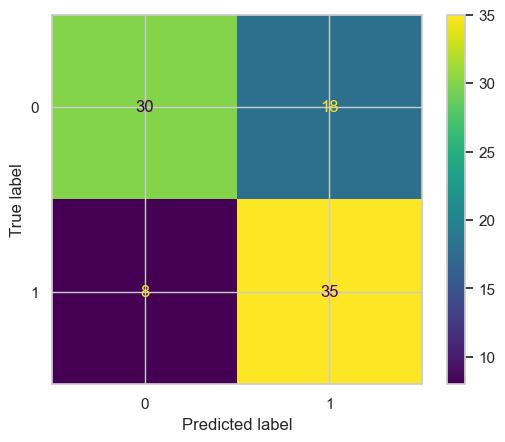

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modeldc, X_test, y_test)

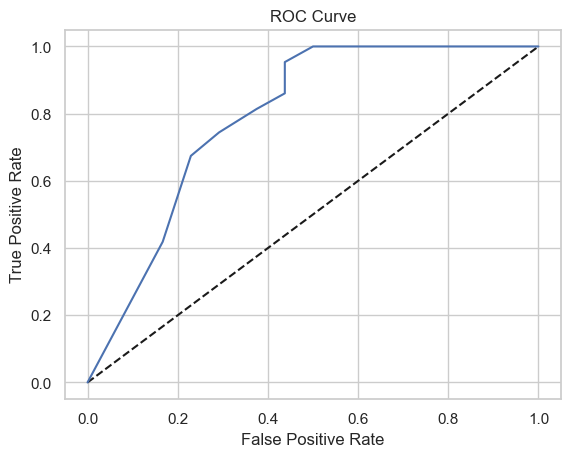

In [75]:
from sklearn.metrics import roc_curve

y_pred_dc = modeldc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()